In [40]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

In [71]:
# Set the default font size for all text in the plot
plt.rcParams.update({'font.size': 24})

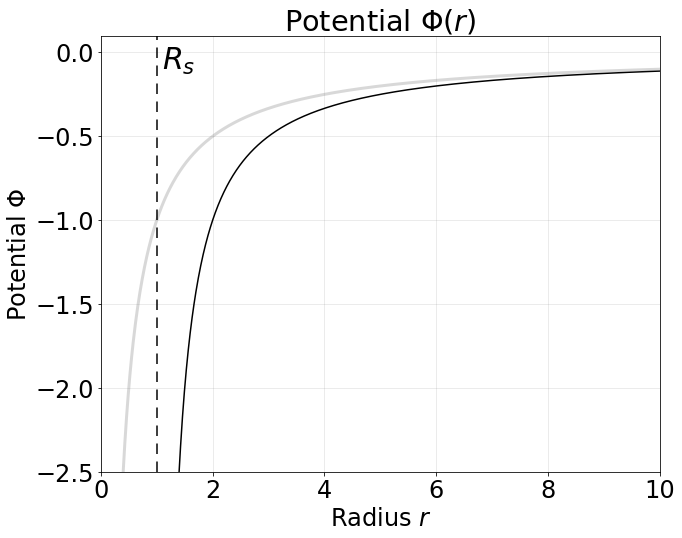

In [83]:
# Constants
G = 1      # Gravitational constant
M = 1      # Mass of the black hole
Rs = 1     # Schwarzschild radius (set to 1 for simplicity)

# Critical radius and angular momentum
rc = 3 * Rs  # Critical radius where last stable circular orbit occurs

# Calculate critical angular momentum Lc
Lc_squared = (27/4) * G * M * Rs  # Lc^2 = (27/4) G M Rs
Lc = np.sqrt(Lc_squared)

# Angular momentum values
L_stable = 1.1 * Lc      # Stable circular orbit exists
L_critical = Lc          # Critical point
L_unstable = 0.9 * Lc    # Circular orbit does not exist
L_values = [L_stable, L_critical, L_unstable]

# Radial range focused near the last stable orbit
r_min, r_max = 1.4, 10
r = np.linspace(r_min, r_max, 1000)
r1 = np.linspace(1e-2, r_max, 1000)

# Potential function
def potential(r, G, M, Rs):
    return -G * M / (r - Rs)

# Effective potential function
def effective_potential(r, G, M, Rs, L):
    return potential(r, G, M, Rs) + L**2 / (2 * r**2)

# Point mass potential (without the Rs shift)
def point_mass_potential(r, G, M):
    return -G * M / r


# Calculate the effective potential for L_stable
Phi_eff_stable = effective_potential(r, G, M, Rs, L_stable)

# Determine Y-axis limits based on the stable orbit effective potential
Phi_eff_min = np.min(Phi_eff_stable)
Phi_eff_max = np.max(Phi_eff_stable)

# Add a small margin to Y-axis limits
margin = 0. * (Phi_eff_max - Phi_eff_min)
y_min = Phi_eff_min - margin
y_max = Phi_eff_max + margin

pot = potential(r, G, M, Rs)

# Plotting potential
fig, ax = plt.subplots(figsize=(10, 8))

# Plot potential with zoomed-in radial range
ax.plot(r, pot, label=r"$\Phi(r)$", color="black")
ax.set_xlim(0., r_max)
ax.set_ylim(np.min(pot), 0.1)

# Plot point mass potential with dashed curve
ax.plot(r1, point_mass_potential(r1, G, M), label="Point Mass Potential", color="grey", alpha=0.3, lw=3)

# Plot vertical lines at r = Rs and r = 3Rs
ax.axvline(x=Rs, color='black', linestyle=(0, (7, 5)))

ax.set_title("Potential $\Phi(r)$")
ax.set_xlabel("Radius $r$")
ax.set_ylabel("Potential $\Phi$")
ax.grid(True)
ax.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

# Mark r_s
ax.text(Rs+0.1, -0.1, '$R_s$', fontsize=30)

plt.tight_layout()

plt.savefig("../Figures/pseudo_black_hole_phi.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()

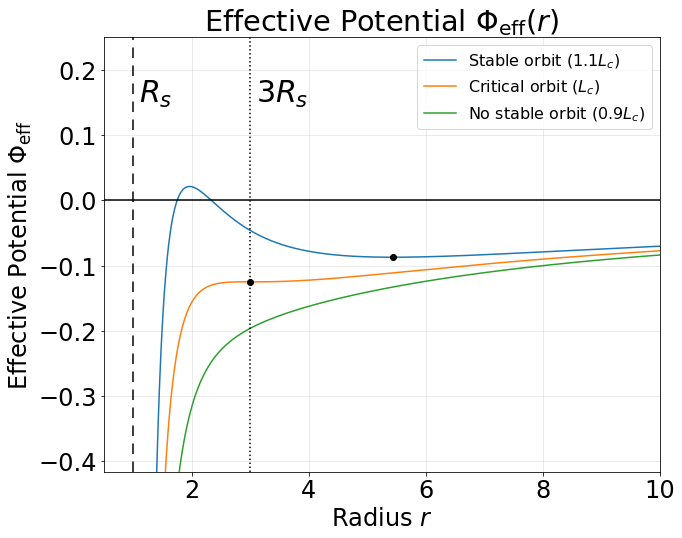

In [84]:
# Plotting effective potential
fig, ax = plt.subplots(figsize=(10, 8))

# Plot effective potentials for the three angular momenta
for L, label_text in zip(
    L_values,
    ["Stable orbit ($1.1 L_c$)", "Critical orbit ($L_c$)", "No stable orbit ($0.9 L_c$)"],
):
    Phi_eff = effective_potential(r, G, M, Rs, L)
    ax.plot(r, Phi_eff, label=label_text)

# Plot vertical lines at r = Rs and r = 3Rs
ax.axvline(x=Rs, color='black', linestyle=(0, (7, 5)))
ax.axvline(x=3*Rs, color='black', linestyle=':')

# Mark the point of stability on stable and critical curves with filled circles
# Function to compute derivative of effective potential
def dPhi_eff_dr(r, G, M, Rs, L):
    dPhi_dr = G*M / (r - Rs)**2
    dCent_dr = -L**2 / r**3
    return dPhi_dr + dCent_dr

# Find the radius where dPhi_eff/dr = 0 for L_stable
def equation_stable(r):
    return dPhi_eff_dr(r, G, M, Rs, L_stable)
r_stable = fsolve(equation_stable, rc)[0]

# Find the radius where dPhi_eff/dr = 0 for L_critical
def equation_critical(r):
    return dPhi_eff_dr(r, G, M, Rs, L_critical)
r_critical = fsolve(equation_critical, rc)[0]

# Compute Phi_eff at these points
Phi_eff_stable_point = effective_potential(r_stable, G, M, Rs, L_stable)
Phi_eff_critical_point = effective_potential(r_critical, G, M, Rs, L_critical)

# Plot the points
ax.plot(r_stable, Phi_eff_stable_point, 'ko')  # black circle
ax.plot(r_critical, Phi_eff_critical_point, 'ko')  # black circle

ax.set_xlim(0.5, r_max)
ax.set_ylim(1.*y_min, 0.25)  # Set Y-axis limits based on stable orbit potential

ax.axhline(y=0, color='black')

# Mark rs and 3rs
ax.text(Rs+0.1, +0.15, '$R_s$', fontsize=30)
ax.text(3*Rs+0.1, +0.15, '$3R_s$', fontsize=30)

ax.set_title("Effective Potential $\Phi_{\mathrm{eff}}(r)$")
ax.set_xlabel("Radius $r$")
ax.set_ylabel("Effective Potential $\Phi_{\mathrm{eff}}$")
ax.legend(fontsize=16)
ax.grid(True)
ax.grid(visible=True, color='grey', alpha=0.3, linewidth=0.5)

plt.tight_layout()

plt.savefig("../Figures/pseudo_black_hole_phieff.png", format="png", 
            dpi=300, transparent=False, facecolor='white', bbox_inches='tight')

plt.show()
